Output()

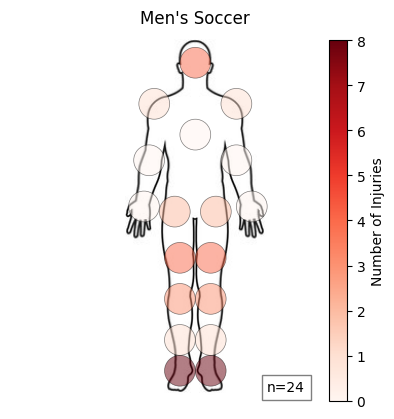

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.colors import Normalize
from PIL import Image
import os
import ipywidgets as widgets
from IPython.display import display

# Define body sections with hotspot coordinates (x, y)
body_hotspots = {
    'Head': (180, 30),
    'Shoulder_r': (140, 70),
    'Shoulder_l': (220, 70),
    'Torso' : (180, 100),
    'Elbow_r': (135, 125),
    'Elbow_l': (220, 125),
    'Wrist_r': (130, 170),
    'Wrist_l': (235, 170),
    'Hip_r': (160, 175),
    'Hip_l': (200, 175),
    'Thigh_r': (165, 220),
    'Thigh_l': (195, 220),
    'Shank_r': (165, 300),
    'Shank_l': (195, 300),
    'Knee_r': (165, 260),
    'Knee_l': (195, 260),
    'Foot_r': (165, 330),
    'Foot_l': (195, 330)
}

# INPUT DATA HERE
injury_data = {
    'Head': 4,
    'Shoulder_r': 1,
    'Shoulder_l': 1,
    'Torso': 0,
    'Elbow_r': 0,
    'Elbow_l': 0,
    'Wrist_r': 0,
    'Wrist_l': 0,
    'Hip_r': 2,
    'Hip_l': 2,
    'Thigh_r': 4,
    'Thigh_l': 4,
    'Shank_r': 1,
    'Shank_l': 1,
    'Knee_r': 3,
    'Knee_l': 3,
    'Foot_r': 8,
    'Foot_l': 8
}

# Function to draw body sections with heatmap using hotspots
def draw_body_sections_with_heatmap(image, body_hotspots, injury_data, grid_size=(360, 360), save_path=None):
    fig, ax = plt.subplots()
    ax.imshow(image)
    plt.title("Men's Soccer")

    # Normalize injury data for color mapping
    norm = Normalize(vmin=0, vmax=max(injury_data.values()))
    colormap = plt.cm.Reds
    
    for section, (x, y) in body_hotspots.items():
        injuries = injury_data.get(section, 0)
        normalized_injuries = norm(injuries)
        color = colormap(normalized_injuries)
        
        # Draw a circle at each hotspot
        circle = patches.Circle((x, y), radius=15, linewidth=0.5, edgecolor='black', facecolor=color, alpha=.5)
        ax.add_patch(circle)
    
    # Set the desired grid position for the colorbar
    grid_x = 260
    grid_y = 50
    cbar_width = 10   # width of the colorbar in grid units
    cbar_height = 270  # height of the colorbar in grid units

    # Convert grid positions to normalized figure coordinates
    grid_width, grid_height = grid_size
    norm_x = grid_x / grid_width
    norm_y = (grid_height - grid_y - cbar_height) / grid_height  # Adjust for bottom-left origin
    norm_width = cbar_width / grid_width
    norm_height = cbar_height / grid_height

    # Create a new set of axes for the colorbar at the desired position
    cbar_ax = fig.add_axes([norm_x, norm_y, norm_width, norm_height])
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), cax=cbar_ax, orientation='vertical')
    cbar.set_label('Number of Injuries')
    
    plt.axis('on')
    
    ax.axis('off')
    ax.text(250, 350, "n=24", bbox=dict(facecolor='white', alpha=0.5))

# Function to load an image with error handling
def load_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found: {image_path}")
    return Image.open(image_path)

# Interactive function to update the injury data and redraw the heat map
def update_heatmap(**kwargs):
    for key, value in kwargs.items():
        injury_data[key] = value
    draw_body_sections_with_heatmap(body_image, body_hotspots, injury_data, save_path='heatmap_image.png')

# Load the image
image_path = #INPUT IMAGE PATH HERE
body_image = load_image(image_path).convert('RGB')
body_image = np.array(body_image)

# Create widgets for each body section to update injury data
widgets_dict = {}
for section in body_hotspots.keys():
    widgets_dict[section] = widgets.IntSlider(value=injury_data[section], min=0, max=20, description=section)

# Create an interactive output
ui = widgets.VBox([widgets_dict[section] for section in body_hotspots.keys()])
out = widgets.interactive_output(update_heatmap, widgets_dict)

# Display the widgets and the output
display(ui, out)

# Save to PNG
draw_body_sections_with_heatmap(body_image, body_hotspots, injury_data, save_path='heatmap_image.png')